# Tiempo de ejecución vs Drones (a y b)

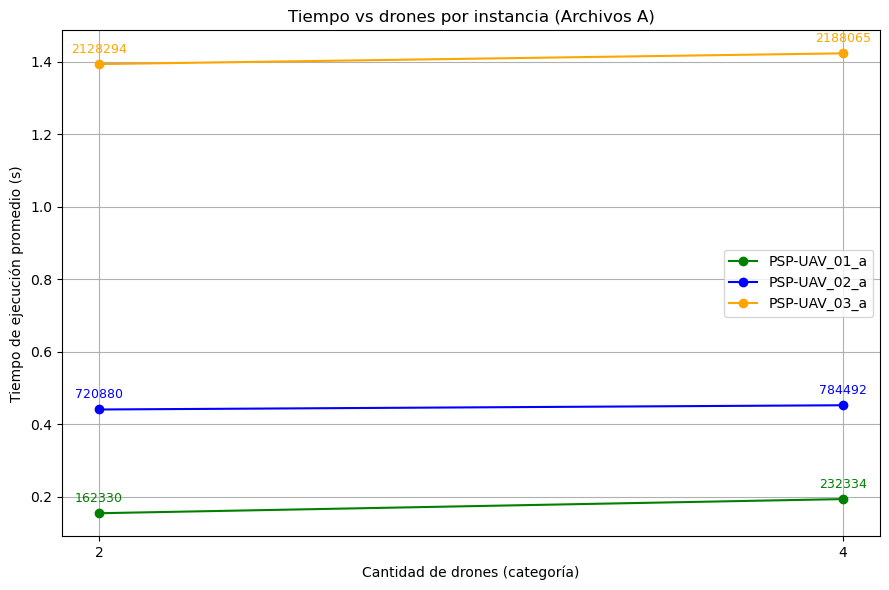

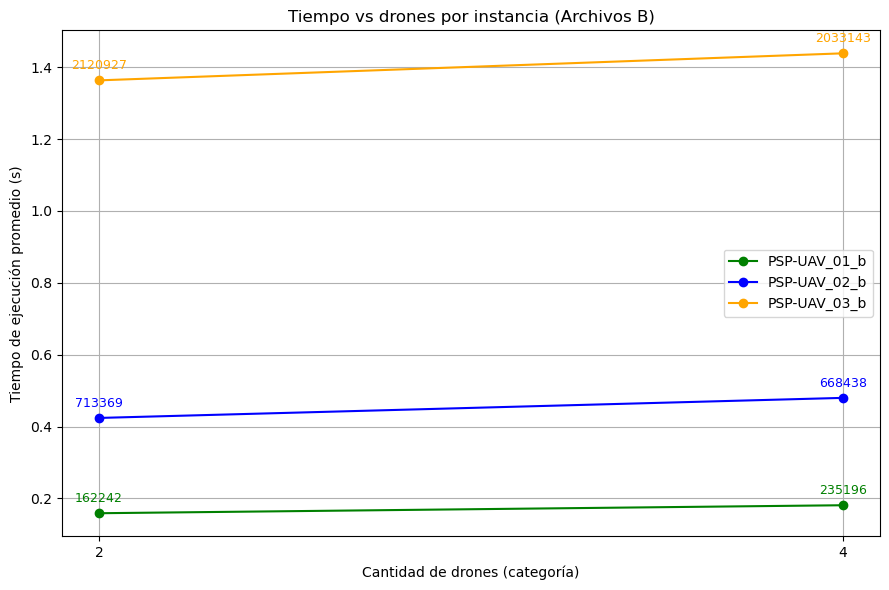

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

HERE = Path(".")

files_a = sorted(HERE.glob("run_*_tiempo_vs_drones_a.csv"))
files_b = sorted(HERE.glob("run_*_tiempo_vs_drones_b.csv"))


def load_and_concat(files):
    dfs = []
    for f in files:
        try:
            dfs.append(pd.read_csv(f))
        except Exception as e:
            print(f"Error leyendo {f}: {e}")
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()


df_a = load_and_concat(files_a)
df_b = load_and_concat(files_b)


def plot_por_instancia(df, title, colors):
    if df.empty:
        print(f"No hay datos para {title}")
        return

    plt.figure(figsize=(9, 6))

    # Obtener lista de instancias (PSP-UAV_01, PSP-UAV_02, PSP-UAV_03)
    instancias = df["instance_stem"].unique()

    for inst, color in zip(instancias, colors):
        df_inst = df[df["instance_stem"] == inst]

        promedios = df_inst.groupby("drones").agg({
            "tiempo_ejecucion": "mean",
            "urgencia": "mean"
        }).reset_index()

        # Eje X discreto
        promedios["drones"] = promedios["drones"].astype(str)

        # Línea
        plt.plot(
            promedios["drones"],
            promedios["tiempo_ejecucion"],
            marker="o",
            color=color,
            label=f"{inst}"
        )

        # Anotaciones con urgencia
        for x, y, urg in zip(
            promedios["drones"],
            promedios["tiempo_ejecucion"],
            promedios["urgencia"]
        ):
            plt.annotate(
                f"{int(urg)}",
                xy=(x, y),
                xytext=(0, 8),
                textcoords="offset points",
                ha="center",
                fontsize=9,
                color=color
            )

    plt.title(title)
    plt.xlabel("Cantidad de drones (categoría)")
    plt.ylabel("Tiempo de ejecución promedio (s)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Gráfico A (verde, azul y naranja)
plot_por_instancia(
    df_a,
    "Tiempo vs drones por instancia (Archivos A)",
    colors=["green", "blue", "orange"]
)

# Gráfico B (verde, azul y naranja)
plot_por_instancia(
    df_b,
    "Tiempo vs drones por instancia (Archivos B)",
    colors=["green", "blue", "orange"]
)


# Tiempo de ejecución vs Ticks (a y b)

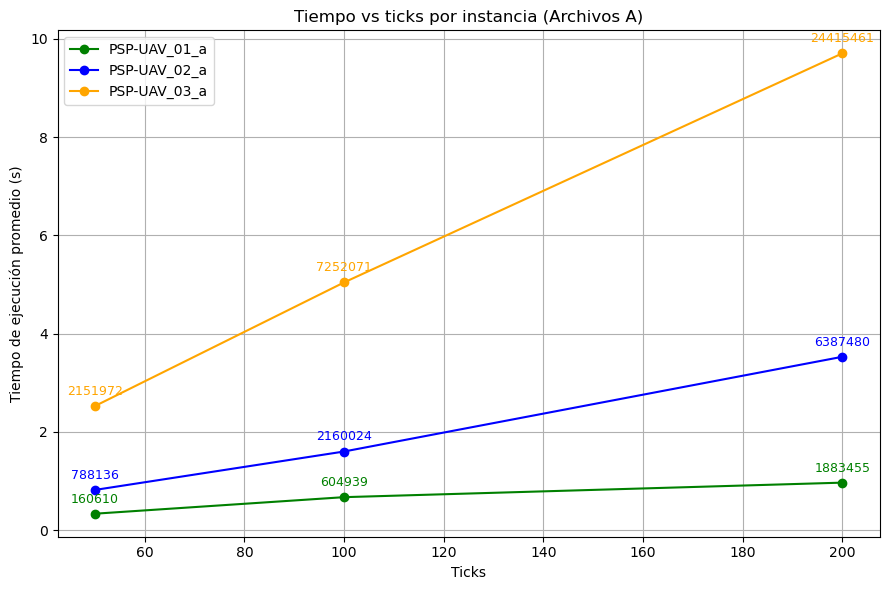

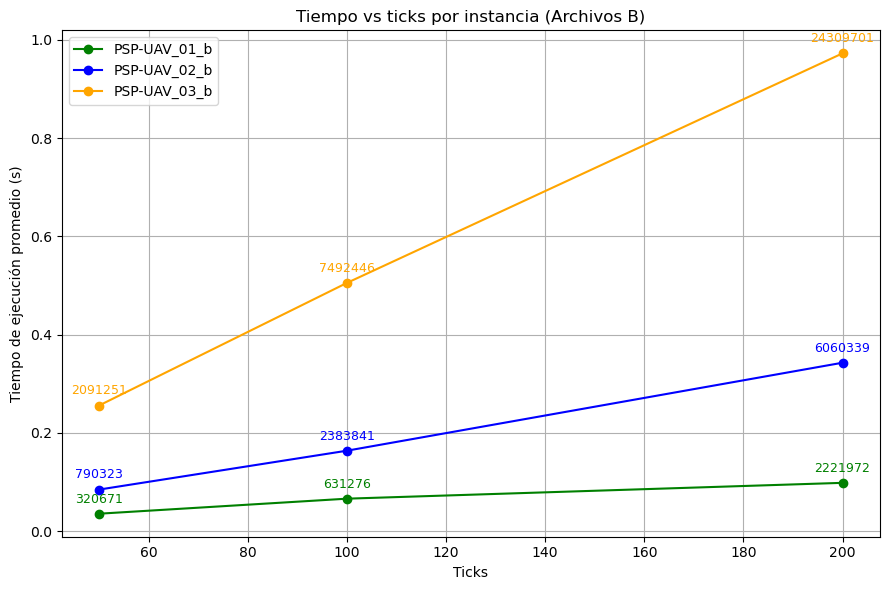

In [4]:
files_ticks_a = sorted(HERE.glob("run_*_tiempo_vs_ticks_a.csv"))
files_ticks_b = sorted(HERE.glob("run_*_tiempo_vs_ticks_b.csv"))

df_ticks_a = load_and_concat(files_ticks_a)
df_ticks_b = load_and_concat(files_ticks_b)


def plot_tiempo_vs_ticks(df, title, colors):
    if df.empty:
        print(f"No hay datos para {title}")
        return

    plt.figure(figsize=(9, 6))
    instancias = df["instance_stem"].unique()

    for inst, color in zip(instancias, colors):
        df_inst = df[df["instance_stem"] == inst]
        promedios = df_inst.groupby("ticks").agg({
            "tiempo_ejecucion": "mean",
            "urgencia": "mean"
        }).reset_index()

        plt.plot(
            promedios["ticks"],
            promedios["tiempo_ejecucion"],
            marker="o",
            color=color,
            label=f"{inst}"
        )

        for x, y, urg in zip(
            promedios["ticks"],
            promedios["tiempo_ejecucion"],
            promedios["urgencia"]
        ):
            plt.annotate(
                f"{int(urg)}",
                xy=(x, y),
                xytext=(0, 8),
                textcoords="offset points",
                ha="center",
                fontsize=9,
                color=color
            )

    plt.title(title)
    plt.xlabel("Ticks")
    plt.ylabel("Tiempo de ejecución promedio (s)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_tiempo_vs_ticks(
    df_ticks_a,
    "Tiempo vs ticks por instancia (Archivos A)",
    colors=["green", "blue", "orange"]
)

plot_tiempo_vs_ticks(
    df_ticks_b,
    "Tiempo vs ticks por instancia (Archivos B)",
    colors=["green", "blue", "orange"]
)


# Valor vs iteraciones a y b

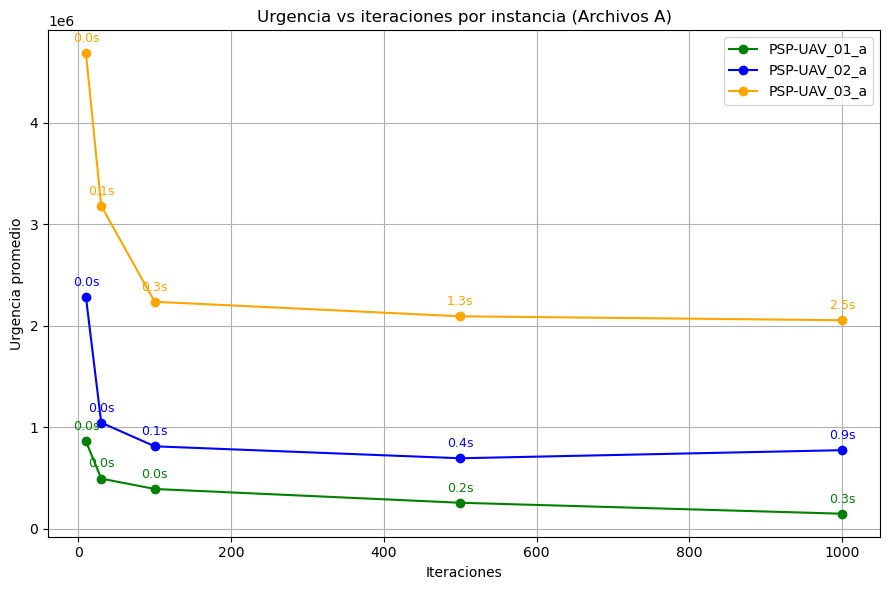

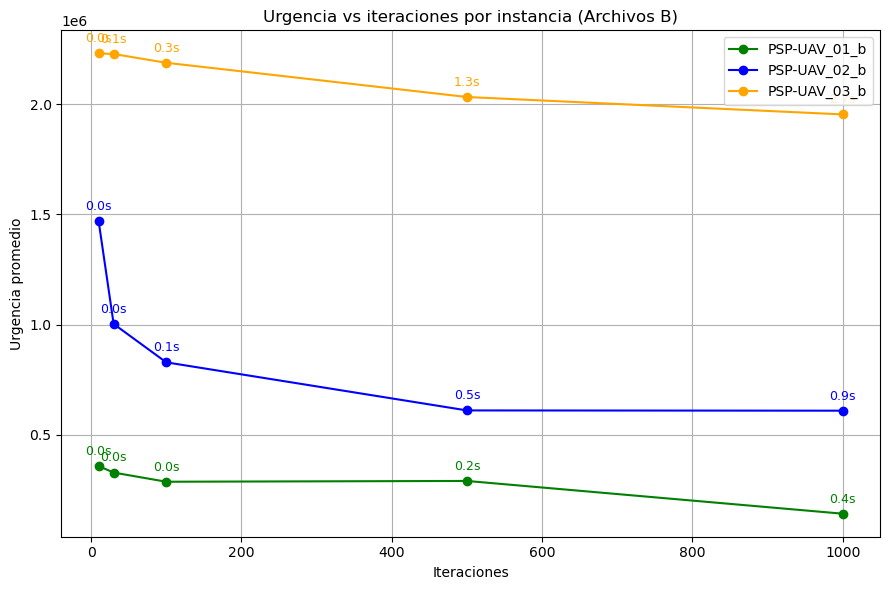

In [5]:
files_valor_a = sorted(HERE.glob("run_*_valor_vs_iteraciones_a.csv"))
files_valor_b = sorted(HERE.glob("run_*_valor_vs_iteraciones_b.csv"))

df_valor_a = load_and_concat(files_valor_a)
df_valor_b = load_and_concat(files_valor_b)


def plot_valor_vs_iteraciones(df, title, colors):
    if df.empty:
        print(f"No hay datos para {title}")
        return

    plt.figure(figsize=(9, 6))
    instancias = df["instance_stem"].unique()

    for inst, color in zip(instancias, colors):
        df_inst = df[df["instance_stem"] == inst]
        promedios = df_inst.groupby("iterations").agg({
            "urgencia": "mean",
            "tiempo_ejecucion": "mean"
        }).reset_index()

        plt.plot(
            promedios["iterations"],
            promedios["urgencia"],
            marker="o",
            color=color,
            label=f"{inst}"
        )

        for x, y, t in zip(
            promedios["iterations"],
            promedios["urgencia"],
            promedios["tiempo_ejecucion"]
        ):
            plt.annotate(
                f"{t:.1f}s",
                xy=(x, y),
                xytext=(0, 8),
                textcoords="offset points",
                ha="center",
                fontsize=9,
                color=color
            )

    plt.title(title)
    plt.xlabel("Iteraciones")
    plt.ylabel("Urgencia promedio")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_valor_vs_iteraciones(
    df_valor_a,
    "Urgencia vs iteraciones por instancia (Archivos A)",
    colors=["green", "blue", "orange"]
)

plot_valor_vs_iteraciones(
    df_valor_b,
    "Urgencia vs iteraciones por instancia (Archivos B)",
    colors=["green", "blue", "orange"]
)
